# Comparison of weighted run with unweighted run


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [3]:
# Loading results from the umweighted run
results_unw_total = xr.load_dataset('results-2020-25/gen_2020s.nc')
results_unw_metrics = xr.load_dataset('results-2020-25/gen_2020s_metrics.nc')

# Loading results from weighted run
results_w_total = xr.load_dataset('results-2020-25_w/gen_2020s.nc')
results_w_metrics = xr.load_dataset('results-2020-25_w/gen_2020s_metrics.nc')

In [3]:
display(results_unw_metrics)

<xarray.Dataset> Size: 64B
Dimensions:      (species: 2)
Coordinates:
  * species      (species) <U5 40B 'CO2' 'total'
Data variables:
    AGWP_6_2020  (species) float32 8B 0.01564 0.01564
    ATR_6_2020   (species) float32 8B 0.0004024 0.0004024
    AGTP_6_2020  (species) float32 8B 0.0 0.0
Attributes:
    Title:    gen_2020s climate metrics

In [9]:
ac = "TOTAL"
dt_unw = results_unw_total.dT_CO2.sel(ac=ac)
agwp_unw = results_unw_metrics.AGWP_6_2020

dt_w = results_w_total.dT_CO2.sel(ac=ac)
agwp_w = results_w_metrics.AGWP_6_2020



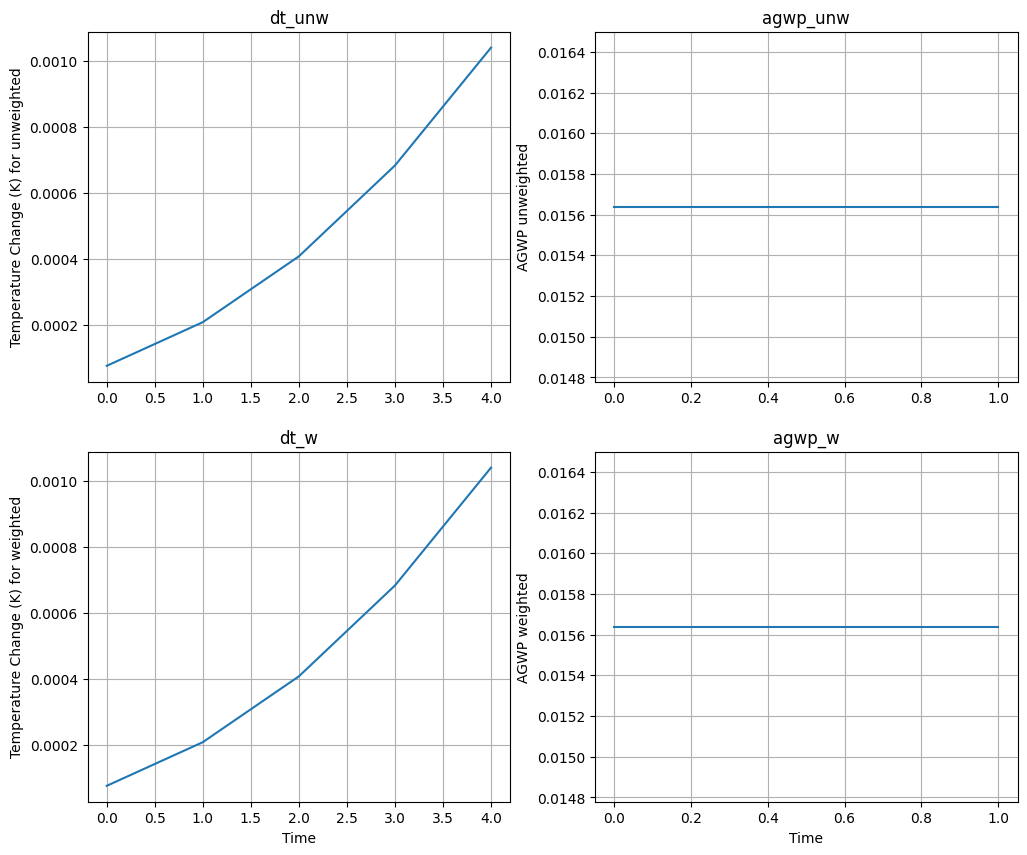

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].plot(dt_unw)
axes[0, 0].set_title('dt_unw')
axes[0, 0].set_ylabel('Temperature Change (K) for unweighted')
axes[0, 0].grid(True)

axes[0, 1].plot(agwp_unw)
axes[0, 1].set_title('agwp_unw')
axes[0, 1].set_ylabel('AGWP unweighted')
axes[0, 1].grid(True)

axes[1, 0].plot(dt_w)
axes[1, 0].set_title('dt_w')
axes[1, 0].set_ylabel('Temperature Change (K) for weighted')
axes[1, 0].set_xlabel('Time')
axes[1, 0].grid(True)

axes[1, 1].plot(agwp_w)
axes[1, 1].set_title('agwp_w')
axes[1, 1].set_ylabel('AGWP weighted')
axes[1, 1].set_xlabel('Time')
axes[1, 1].grid(True)

plt.show()

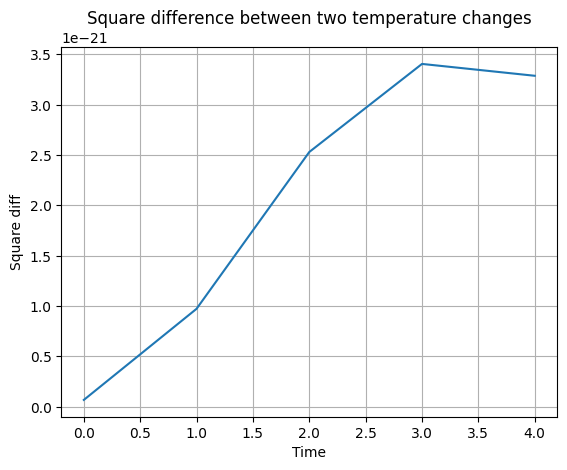

In [14]:
dt_sq_diff = (dt_unw - dt_w) ** 2

plt.figure()
plt.plot(dt_sq_diff)
plt.title('Square difference between two temperature changes')
plt.xlabel('Time')
plt.ylabel('Square diff')
plt.grid(True)
plt.show()